In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from nltk import ngrams
import string
from collections import Counter
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Vita/Nuova Uni/Uni/Secondo Anno/Primo Semestre/Web Marketing/Amaon reviews.zip (Unzipped Files)/recensioni_amazon.csv")

In [ ]:
df.head()

,Unnamed: 0,Autore,Stelle,Data,Titolo,Recensione,Lingua,Recensione_tradotta
0,0,Alex,1,2023-09-28,Cineasta. Soldi buttati.,Sarò molto breve in questa recensione.A parte ...,it,Sarò molto breve in questa recensione.A parte ...
1,1,vincenzo buglino,1,2023-10-26,Audio chiamate,Dopo circa 12 giorni l'audio in chiamata non f...,it,Dopo circa 12 giorni l'audio in chiamata non f...
2,2,Enza,1,2023-10-24,Si è rotto poco dopo più di un mese,Dopo esattamente 1 mese e 2 giorni si è rotto ...,it,Dopo esattamente 1 mese e 2 giorni si è rotto ...
3,3,Tino,1,2023-10-21,No comment,Fatemi capire per accendere un orologio bisogn...,it,Fatemi capire per accendere un orologio bisogn...
4,4,Cliente Amazon,1,2023-10-23,Smartwatch,Il mio articolo nn funziona il Tel posso chiam...,it,Il mio articolo nn funziona il Tel posso chiam...


In [ ]:
# Funzione di preprocessing
def preprocess_text(text):
    # Verifica se il valore è NaN
    if pd.isna(text):
        return ""

    # Rimuovi la punteggiatura tranne l'apostrofo
    text = ''.join(char if char.isalnum() or char == "'" else ' ' for char in text)

    # Converti il testo in minuscolo
    text = text.lower()

    return text

# Applica la funzione di preprocessing alla colonna "Recensione_tradotta"
df['preprocessed_text'] = df['Recensione_tradotta'].apply(preprocess_text)

In [ ]:
df.head(5)

,Unnamed: 0,Autore,Stelle,Data,Titolo,Recensione,Lingua,Recensione_tradotta,preprocessed_text
0,0,Alex,1,2023-09-28,Cineasta. Soldi buttati.,Sarò molto breve in questa recensione.A parte ...,it,Sarò molto breve in questa recensione.A parte ...,sarò molto breve in questa recensione a parte ...
1,1,vincenzo buglino,1,2023-10-26,Audio chiamate,Dopo circa 12 giorni l'audio in chiamata non f...,it,Dopo circa 12 giorni l'audio in chiamata non f...,dopo circa 12 giorni l'audio in chiamata non f...
2,2,Enza,1,2023-10-24,Si è rotto poco dopo più di un mese,Dopo esattamente 1 mese e 2 giorni si è rotto ...,it,Dopo esattamente 1 mese e 2 giorni si è rotto ...,dopo esattamente 1 mese e 2 giorni si è rotto ...
3,3,Tino,1,2023-10-21,No comment,Fatemi capire per accendere un orologio bisogn...,it,Fatemi capire per accendere un orologio bisogn...,fatemi capire per accendere un orologio bisogn...
4,4,Cliente Amazon,1,2023-10-23,Smartwatch,Il mio articolo nn funziona il Tel posso chiam...,it,Il mio articolo nn funziona il Tel posso chiam...,il mio articolo nn funziona il tel posso chiam...


#Recensioni con più di 3 stelle

In [ ]:
# Unisci tutti i documenti in un unico testo
all_text = ' '.join(df[df['Stelle'] > 3]['preprocessed_text'])

In [ ]:
# Funzione per ottenere i trigrammi
def get_trigrams(text):
    return ngrams(text.split(), 3)

# Applica la funzione dei trigrammi al testo
trigrams = get_trigrams(all_text)

# Conta le occorrenze dei trigrammi
trigram_freq = Counter(trigrams)

# Ottieni i 50 trigrammi più frequenti
top_trigrams = trigram_freq.most_common(50)



In [ ]:
recensioni_pos = {}
for i in top_trigrams:
    frase = i[0][0] + ' ' + i[0][1] + ' ' + i[0][2]
    recensioni_pos[frase] = i[1]


In [ ]:
recensioni_pos

{'facile da usare': 13,
 'rapporto qualità prezzo': 13,
 'per il prezzo': 8,
 'per il resto': 6,
 'durata della batteria': 5,
 'ottimo rapporto qualità': 5,
 'tutte le funzioni': 5,
 'fa il suo': 4,
 'molto comodo e': 4,
 'e facile da': 4,
 'non è stato': 4,
 "un po' di": 4,
 'il rapporto qualità': 4,
 'la batteria dura': 4,
 'il prezzo è': 4,
 'del prodotto in': 3,
 'in fase di': 3,
 'anche la funzione': 3,
 'da usare e': 3,
 'che non è': 3,
 'non è possibile': 3,
 'funziona molto bene': 3,
 'un buon orologio': 3,
 'non riesco a': 3,
 'ho comprato questo': 3,
 'comprato questo orologio': 3,
 'rispondere alle chiamate': 3,
 'è stato un': 3,
 'stato un regalo': 3,
 'la frequenza cardiaca': 3,
 'tutto ciò che': 3,
 'mi è piaciuto': 3,
 'sono molto soddisfatto': 3,
 'per me è': 3,
 'funziona alla grande': 3,
 'tutte le notifiche': 3,
 'lo consiglio ottimo': 3,
 'un sacco di': 3,
 'sacco di funzioni': 3,
 'mi piace molto': 3,
 'devo dire che': 2,
 'la descrizione del': 2,
 'descrizione del

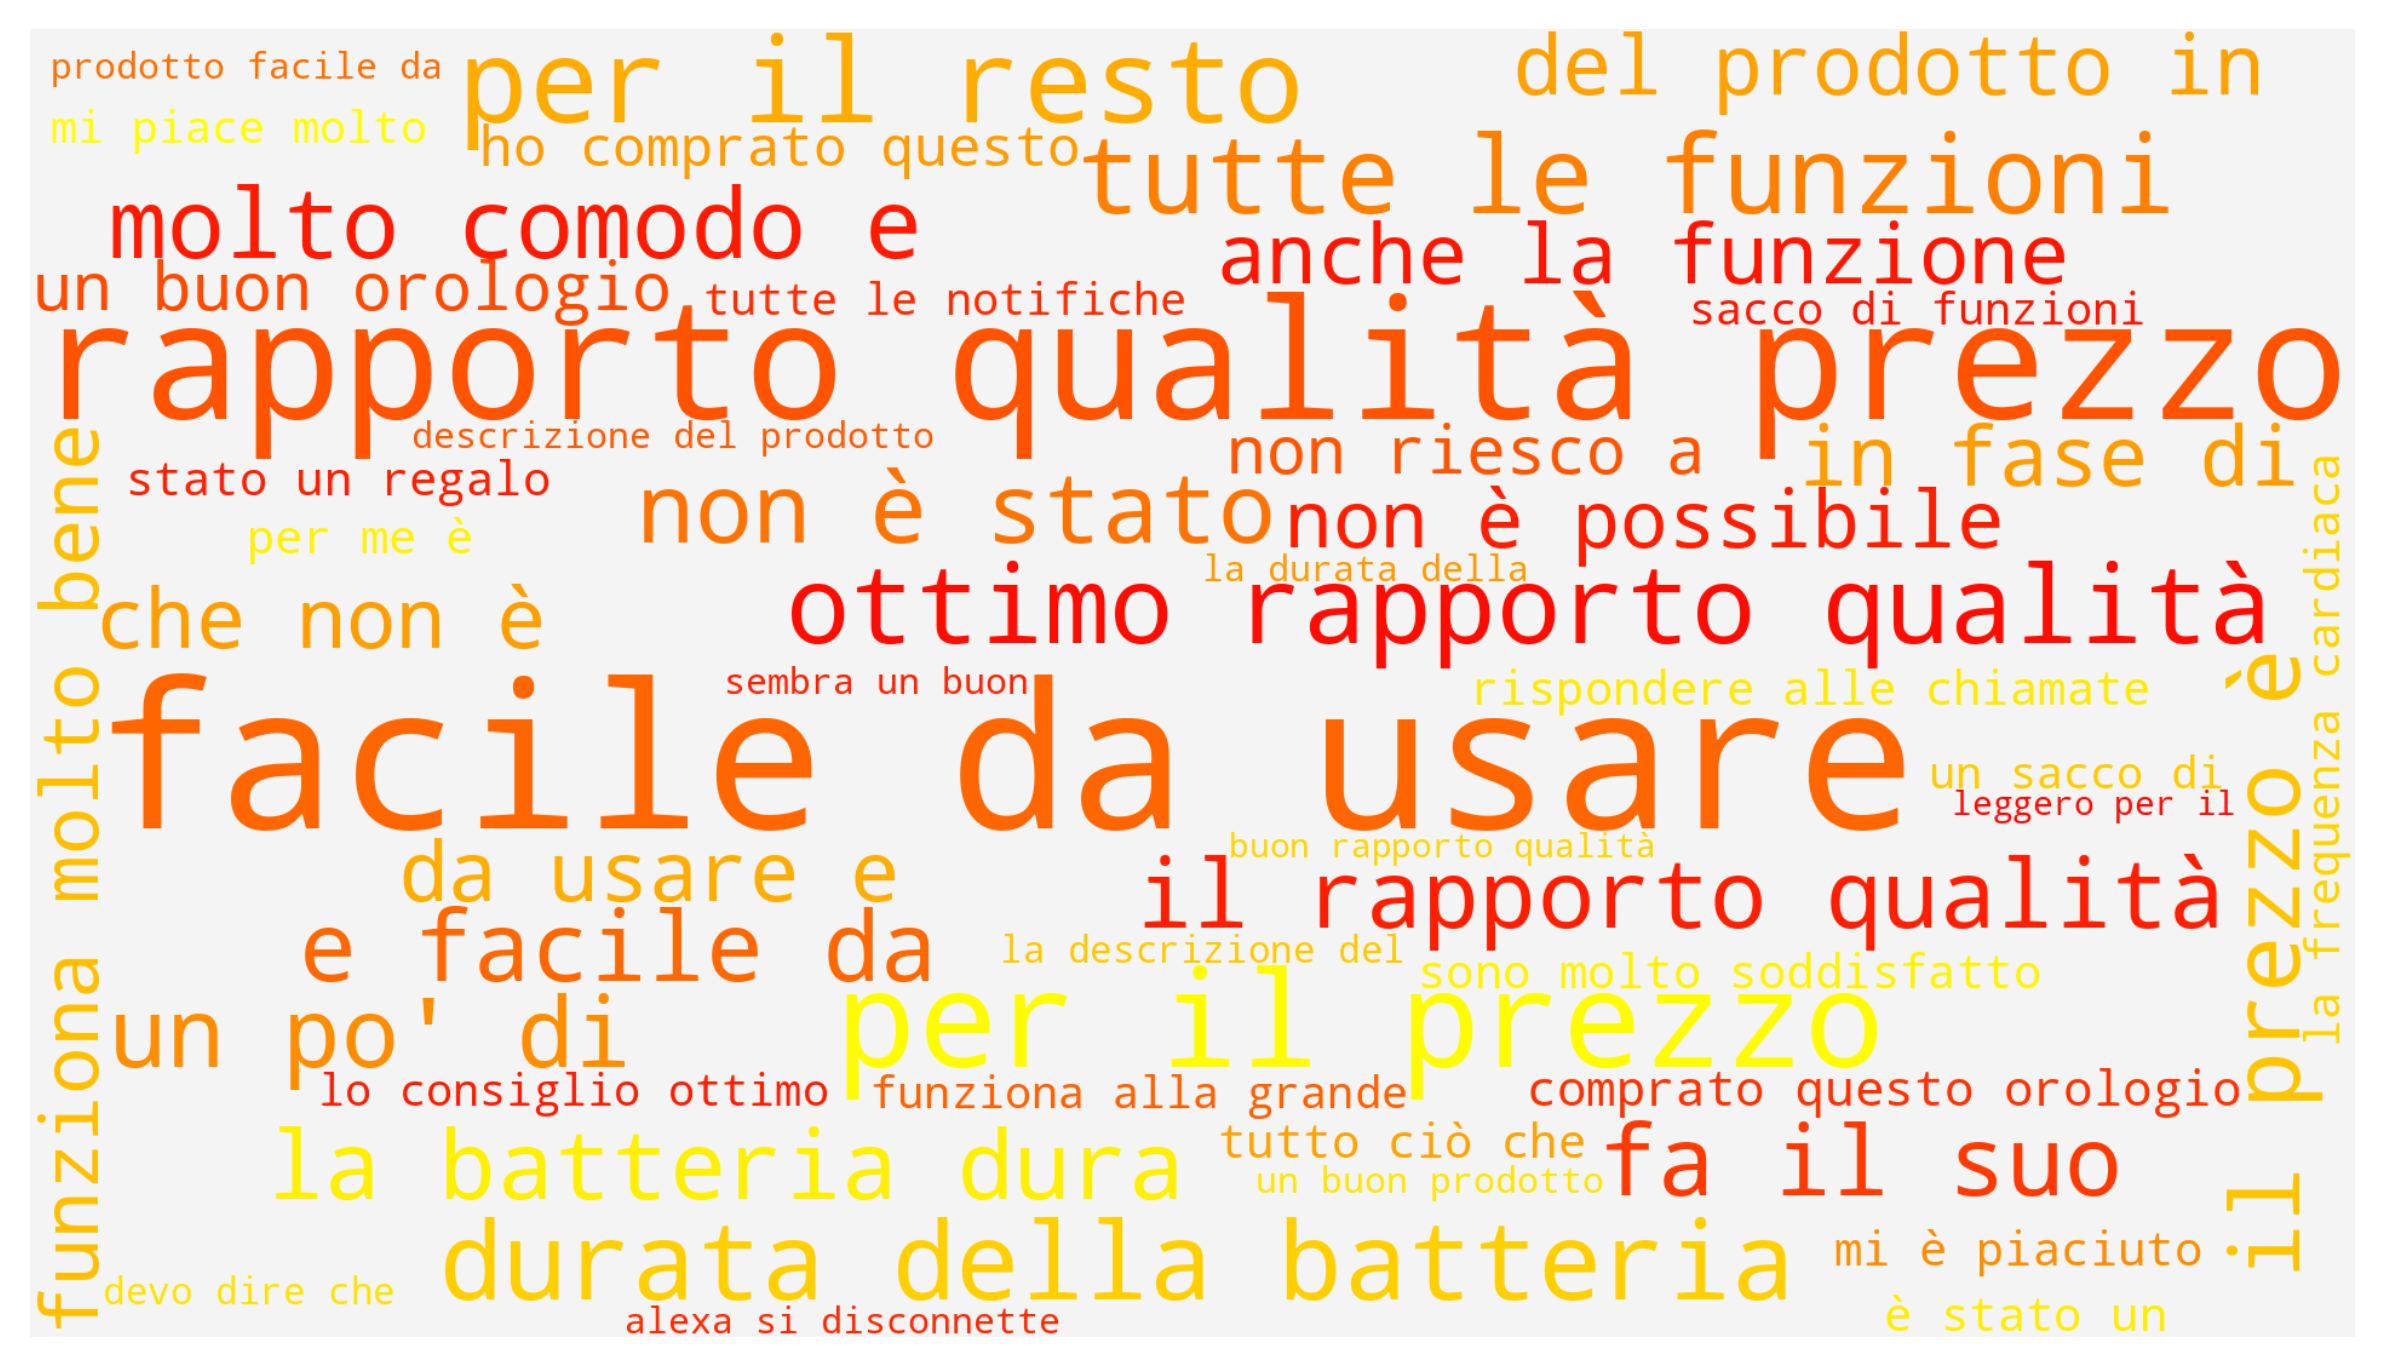

In [ ]:
wc = WordCloud(width=1920, height=1080, max_words=200, contour_color=None, background_color='#F4F4F4', colormap = 'autumn_r')
wc.generate_from_frequencies(recensioni_pos)
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Dataset con frasi più comuni

In [ ]:
recensioni_pos_df = pd.DataFrame.from_dict(recensioni_pos, orient='index', columns=['Occorrenze'])

In [ ]:
recensioni_pos_df

#Recensioni con meno di 3 stelle

In [ ]:
# Unisci tutti i documenti in un unico testo
all_text_less_3 = ' '.join(df[df['Stelle'] <= 3]['preprocessed_text'])

In [ ]:
# Applica la funzione di bigrammi al testo
trigrams_less_3 = get_trigrams(all_text_less_3)

# Conta le occorrenze dei bigrammi
trigram_freq_less_3 = Counter(trigrams_less_3)

# Ottieni i 10 bigrammi più frequenti
top_trigrams_less_3 = trigram_freq_less_3.most_common(50)
print(top_trigrams_less_3)

In [ ]:
recensioni_neg = {}
for i in top_trigrams_less_3:
    frase = i[0][0] + ' ' + i[0][1] + ' ' + i[0][2]
    recensioni_neg[frase] = i[1]

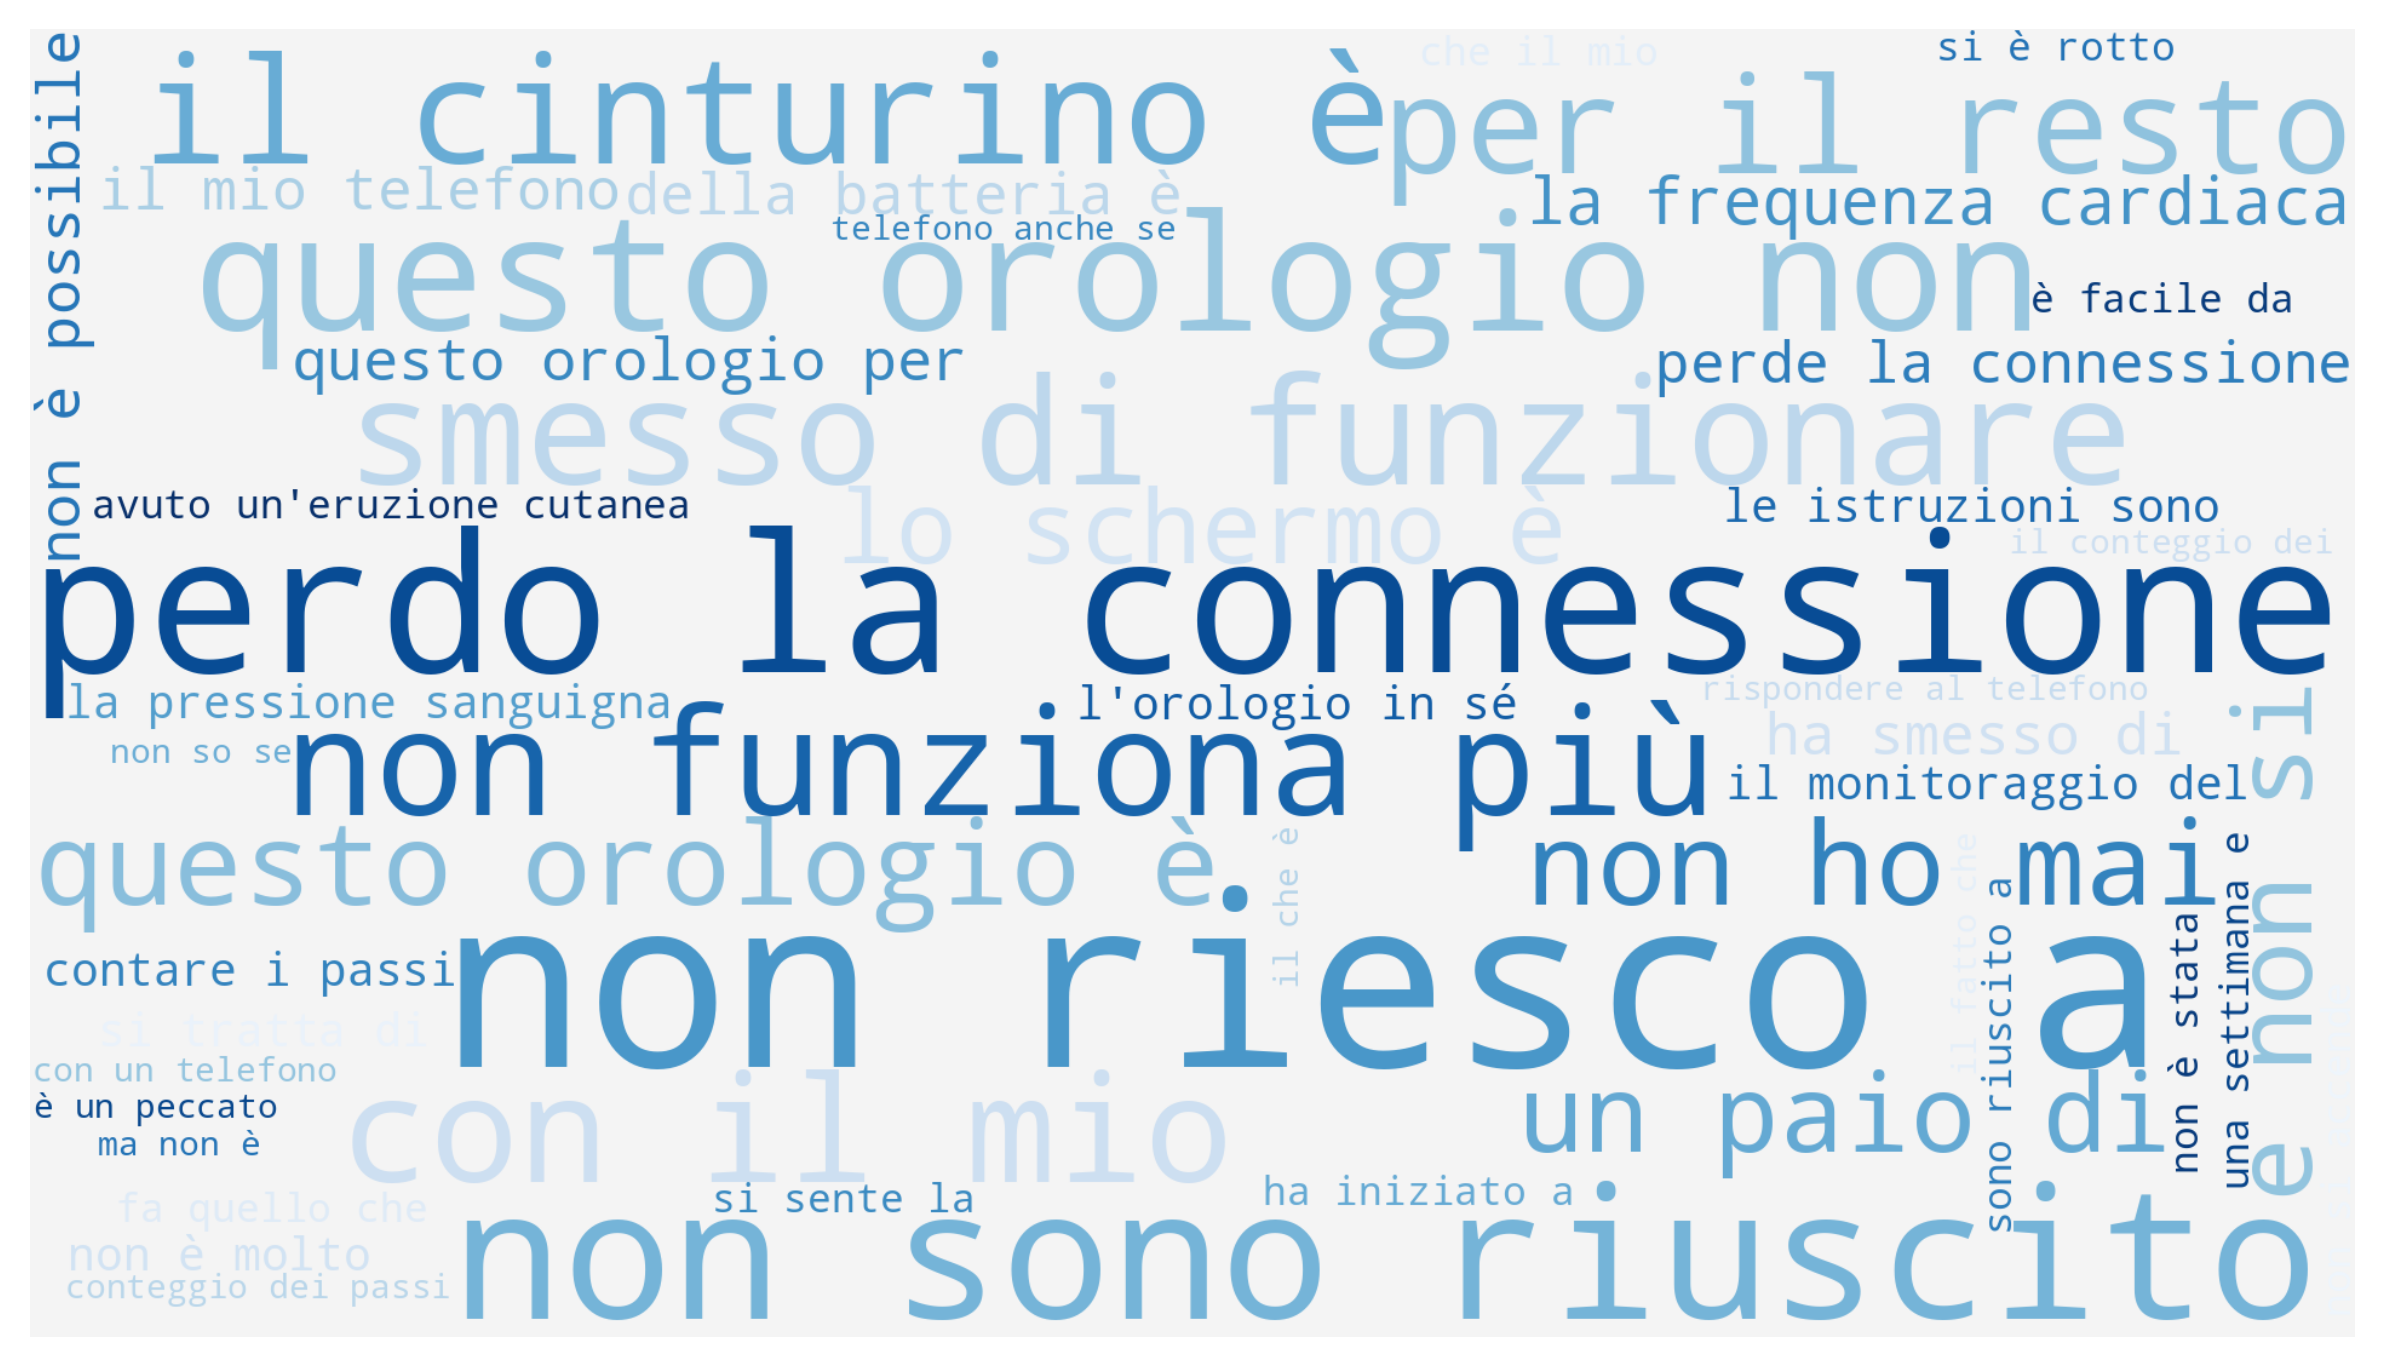

In [ ]:
wc = WordCloud(width=1920, height=1080, max_words=200, contour_color=None, background_color='#F4F4F4', colormap = 'Blues_r')
wc.generate_from_frequencies(recensioni_neg)
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
recensioni_neg_df = pd.DataFrame.from_dict(recensioni_neg, orient='index', columns=['Occorrenze'])

In [ ]:
recensioni_neg_df